In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import os

In [2]:
xls = pd.ExcelFile(r'D:\UAESP\Corte_Cesped\file_test.xlsx')
folder_image_outputs = r"D:\UAESP\Corte_Cesped\plots_outputs"
df_precipitaciones = pd.read_excel(xls)
df_precipitaciones.dtypes

FECHALECTURA             object
ACUMULADO  VITELMA      float64
ACUMULADO COL ALEMAN    float64
dtype: object

In [3]:
df_precipitaciones["FECHALECTURA"] = df_precipitaciones["FECHALECTURA"].astype('datetime64[ns]')
df_precipitaciones

,FECHALECTURA,ACUMULADO VITELMA,ACUMULADO COL ALEMAN
0,2022-03-30,0.8,0.11
1,2022-03-31,4.7,22.53
2,2022-04-01,0.0,0.00
3,2022-04-02,0.0,0.00
4,2022-04-03,0.0,0.00
...,...,...,...
242,2022-11-27,16.1,17.84
243,2022-11-28,15.2,9.20
244,2022-11-29,21.3,9.43
245,2022-11-30,1.1,0.53


In [4]:
#verificar siempre el indice de las columnas donde esta el valor de la ppt de las estaciones
df_precipitaciones["PROMEDIO"] =  (df_precipitaciones.iloc[:, 1] + df_precipitaciones.iloc[:, 2])/2
df_precipitaciones

,FECHALECTURA,ACUMULADO VITELMA,ACUMULADO COL ALEMAN,PROMEDIO
0,2022-03-30,0.8,0.11,0.455
1,2022-03-31,4.7,22.53,13.615
2,2022-04-01,0.0,0.00,0.000
3,2022-04-02,0.0,0.00,0.000
4,2022-04-03,0.0,0.00,0.000
...,...,...,...,...
242,2022-11-27,16.1,17.84,16.970
243,2022-11-28,15.2,9.20,12.200
244,2022-11-29,21.3,9.43,15.365
245,2022-11-30,1.1,0.53,0.815


In [5]:
a_indices = df_precipitaciones.index.to_numpy()
a_val_ppt_1 = df_precipitaciones.iloc[:, 1].to_numpy()
a_val_ppt_2 = df_precipitaciones.iloc[:, 2].to_numpy()
a_fechas_lecturas = df_precipitaciones.iloc[:, 0].to_numpy()

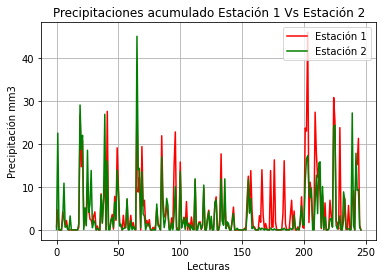

<Figure size 720x720 with 0 Axes>

In [6]:
# ploteando precipitaciones
g_indices = a_indices
g_ppt_1 = a_val_ppt_1
g_ppt_2 = a_val_ppt_2
g_fecha_lec = a_fechas_lecturas

fig, ax = plt.subplots()
ax.grid()

plt.title('Precipitaciones acumulado Estación 1 Vs Estación 2')
plt.xlabel('Lecturas')
plt.ylabel('Precipitación mm3')

plt.plot(g_indices, g_ppt_1, 'r')
plt.plot(g_indices, g_ppt_2, 'g')
plt.legend(["Estación 1", "Estación 2"], loc ="upper right")
plt.figure(figsize=(10, 10))
plt.show()

image_format = 'jpeg'
image_name = 'ppt_vs_1.jpeg'
fig.savefig(os.path.join(folder_image_outputs, image_name), format=image_format, dpi=400)
plt.show()

In [7]:
df_filtered = df_precipitaciones[["ACUMULADO  VITELMA", "ACUMULADO COL ALEMAN"]]
df_filtered

,ACUMULADO VITELMA,ACUMULADO COL ALEMAN
0,0.8,0.11
1,4.7,22.53
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
242,16.1,17.84
243,15.2,9.20
244,21.3,9.43
245,1.1,0.53


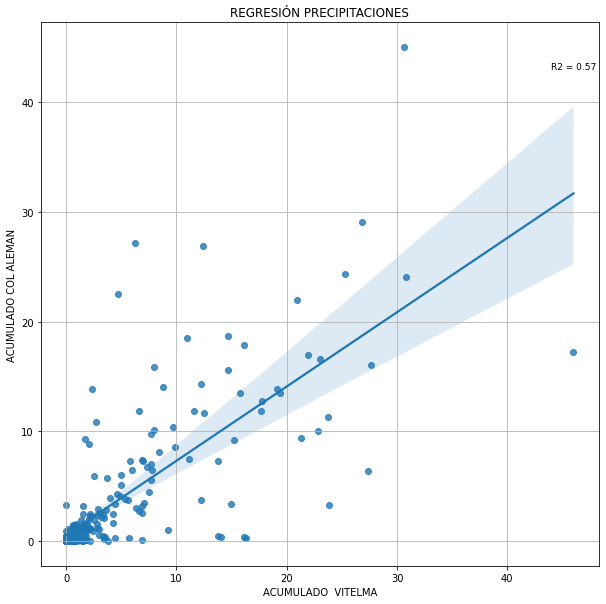

In [31]:
def r2(x, y):
    return sp.stats.pearsonr(x, y)[0] ** 2

r2_val = r2(df_filtered['ACUMULADO  VITELMA'], y=df_filtered['ACUMULADO COL ALEMAN'])

plt.figure(figsize=(10,10))
plt.title('REGRESIÓN PRECIPITACIONES')
ax = sns.regplot(x = "ACUMULADO  VITELMA", y = "ACUMULADO COL ALEMAN", data = df_filtered)
ax.text(max(df_filtered['ACUMULADO  VITELMA'])-2, max(df_filtered['ACUMULADO COL ALEMAN'])-2,'R2 = ' + str(round(r2_val, 2)), fontsize=9) #add text
ax.grid()
image_name_2 = 'Regresion_precipitaciones_1.jpeg'
plt.savefig(os.path.join(folder_image_outputs, image_name_2), dpi=300)
plt.show()

In [8]:
xls_fechas_cortes = pd.ExcelFile(r'D:\UAESP\Corte_Cesped\file_test_2_fechas_cortes_.xlsx')
df_fechas_cortes = pd.read_excel(xls_fechas_cortes)
df_fechas_cortes.dtypes

ObjectID                      int64
Parcela                      object
Fecha Corte          datetime64[ns]
Fecha de Medición    datetime64[ns]
Tipo                         object
M1                          float64
M2                          float64
M3                          float64
M4                          float64
Promedio                    float64
dtype: object

In [9]:
#borrar filas con nulos
df_fechas_cortes = df_fechas_cortes.dropna()

In [10]:
df_fechas_cortes

,ObjectID,Parcela,Fecha Corte,Fecha de Medición,Tipo,M1,M2,M3,M4,Promedio
0,41,AN_1_100,2022-03-30,2022-03-30,Andén,1.0,1.0,0.5,1.0,0.875
1,78,AN_1_100,2022-03-30,2022-04-06,Andén,1.0,4.0,7.5,4.0,4.125
2,140,AN_1_100,2022-03-30,2022-04-13,Andén,3.5,4.0,3.0,2.5,3.250
3,170,AN_1_100,2022-03-30,2022-04-20,Andén,5.0,6.0,5.0,9.5,6.375
4,232,AN_1_100,2022-04-27,2022-04-27,Andén,2.0,3.0,0.7,1.5,1.800
5,55,AN_1_100,2022-04-27,2022-05-04,Andenes,2.8,3.7,2.6,2.6,2.925
6,126,AN_1_100,2022-04-27,2022-05-11,Andenes,4.0,3.7,3.2,3.4,3.575
7,199,AN_1_100,2022-04-27,2022-05-18,Andenes,6.0,2.5,4.5,4.5,4.375
8,309,AN_1_100,2022-05-24,2022-05-28,Andenes,1.8,2.2,2.5,2.0,2.125
9,355,AN_1_100,2022-05-24,2022-06-01,Andenes,2.3,2.8,3.2,3.3,2.900


In [24]:
#conseguir fechas unicas

fechas_unicas = df_fechas_cortes[["Fecha Corte"]]
df_fechas_unicas = fechas_unicas.drop_duplicates("Fecha Corte").reset_index(drop=True)
df_fechas_unicas

,Fecha Corte
0,2022-03-30
1,2022-04-27
2,2022-05-24
3,2022-06-28
4,2022-07-26
5,2022-08-23
6,2022-09-26


In [95]:
a_fechas_corte = []
a_fechas_medicion = []
a_ppt_promedio = []
a_alt_promedio_pasto = []
a_ppt_promedio_acumulado = []
a_diff_promedio_alt_pasto = []

In [96]:
#consiguiendo fechas de cortes y promedio altura pasto

inicial_fecha_corte = df_fechas_unicas["Fecha Corte"].values[0]
df_fechas_unicas_filtered = df_fechas_cortes[df_fechas_cortes["Fecha Corte"] == inicial_fecha_corte]
ultima_fecha_medicion = df_fechas_unicas_filtered["Fecha de Medición"].max()
ultima_altura_pasto = df_fechas_unicas_filtered["Promedio"].values[-1]
diff_altura_pasto = df_fechas_unicas_filtered["Promedio"].values[-1] - df_fechas_unicas_filtered["Promedio"].values[0]

In [97]:
#agregando fechas, altura promedio y diferencia promedio

a_fechas_corte.append(df_fechas_unicas["Fecha Corte"][0])
a_fechas_medicion.append(ultima_fecha_medicion)
a_alt_promedio_pasto.append(ultima_altura_pasto)
a_diff_promedio_alt_pasto.append(diff_altura_pasto)

In [98]:
#consiguiendo pmm promedio

df_ultima_ppt_promedio = df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion]
df_ultima_ppt_promedio

,FECHALECTURA,ACUMULADO VITELMA,ACUMULADO COL ALEMAN,PROMEDIO
21,2022-04-20,20.9,22.01,21.455


In [99]:
val_ultima_ppt_promedio = df_ultima_ppt_promedio["PROMEDIO"].values[0]
val_ultima_ppt_promedio
a_ppt_promedio.append(val_ultima_ppt_promedio)

In [100]:
#consiguiendo pmm promedio acumulado

df_ppt_promedio_acumulado = df_precipitaciones[(df_precipitaciones["FECHALECTURA"] >= inicial_fecha_corte) &
                                               (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]
df_ppt_promedio_acumulado

,FECHALECTURA,ACUMULADO VITELMA,ACUMULADO COL ALEMAN,PROMEDIO
0,2022-03-30,0.8,0.11,0.455
1,2022-03-31,4.7,22.53,13.615
2,2022-04-01,0.0,0.00,0.000
3,2022-04-02,0.0,0.00,0.000
4,2022-04-03,0.0,0.00,0.000
5,2022-04-04,4.2,2.49,3.345
6,2022-04-05,2.7,10.89,6.795
7,2022-04-06,1.0,0.63,0.815
8,2022-04-07,2.2,1.09,1.645
9,2022-04-08,0.4,0.07,0.235


In [113]:
#consiguiendo ultimo indice
df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion].index.values[0]

21

In [114]:
df_precipitaciones[(df_precipitaciones.index >= 10) &
                   (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]

,FECHALECTURA,ACUMULADO VITELMA,ACUMULADO COL ALEMAN,PROMEDIO
10,2022-04-09,0.0,0.00,0.000
11,2022-04-10,0.0,3.25,1.625
12,2022-04-11,0.0,0.00,0.000
13,2022-04-12,0.0,0.01,0.005
14,2022-04-13,0.0,0.00,0.000
15,2022-04-14,0.0,0.01,0.005
16,2022-04-15,0.0,0.00,0.000
17,2022-04-16,0.0,0.00,0.000
18,2022-04-17,0.6,1.47,1.035
19,2022-04-18,26.8,29.07,27.935


In [101]:
value_ppt_promedio_acumulado = df_ppt_promedio_acumulado["PROMEDIO"].sum()
a_ppt_promedio_acumulado.append(value_ppt_promedio_acumulado)

In [135]:
#conseguir fechas unicas
fechas_unicas = df_fechas_cortes[["Fecha Corte"]]
df_fechas_unicas = fechas_unicas.drop_duplicates("Fecha Corte").reset_index(drop=True)

a_fechas_corte = []
a_fechas_medicion = []
a_ppt_promedio = []
a_alt_promedio_pasto = []
a_ppt_promedio_acumulado = []
a_diff_promedio_alt_pasto = []
a_valores_index = []

for j in range(0, len(df_fechas_unicas)):
    
    print(j)
    
    #consiguiendo fechas de cortes y promedio altura pasto

    inicial_fecha_corte = df_fechas_unicas["Fecha Corte"].values[j]
    df_fechas_unicas_filtered = df_fechas_cortes[df_fechas_cortes["Fecha Corte"] == inicial_fecha_corte]
    ultima_fecha_medicion = df_fechas_unicas_filtered["Fecha de Medición"].max()
    ultima_altura_pasto = df_fechas_unicas_filtered["Promedio"].values[-1]
    diff_altura_pasto = df_fechas_unicas_filtered["Promedio"].values[-1] - df_fechas_unicas_filtered["Promedio"].values[0]
    
    #agregando fechas, altura promedio y diferencia promedio

    a_fechas_corte.append(inicial_fecha_corte)
    a_fechas_medicion.append(ultima_fecha_medicion)
    a_alt_promedio_pasto.append(ultima_altura_pasto)
    a_diff_promedio_alt_pasto.append(diff_altura_pasto)
    
    #consiguiendo pmm promedio

    df_ultima_ppt_promedio = df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion]
    val_ultima_ppt_promedio = df_ultima_ppt_promedio["PROMEDIO"].values[0]
    val_ultima_ppt_promedio
    a_ppt_promedio.append(val_ultima_ppt_promedio)
    
    #consiguiendo pmm promedio acumulado
    
    valor_salto_index = df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion].index.values[0]
    a_valores_index.append(valor_salto_index)
    
    if j == 0:
        
        df_ppt_promedio_acumulado = df_precipitaciones[(df_precipitaciones["FECHALECTURA"] >= inicial_fecha_corte) &
                                                   (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]
    else:
        
        df_ppt_promedio_acumulado = df_precipitaciones[(df_precipitaciones.index > a_valores_index[j-1]) & 
                                                       (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]
        
    value_ppt_promedio_acumulado = df_ppt_promedio_acumulado["PROMEDIO"].sum()
    a_ppt_promedio_acumulado.append(value_ppt_promedio_acumulado)

0
1
2
3
4
5
6


In [136]:
df_final_analisis = pd.DataFrame()
df_final_analisis["fecha_corte"] = a_fechas_corte
df_final_analisis["fecha_medicion"] = a_fechas_medicion
df_final_analisis["pmm_prom"] = a_ppt_promedio
df_final_analisis["h_prom_pasto"] = a_alt_promedio_pasto
df_final_analisis["pmm_prom_acumulada"] = a_ppt_promedio_acumulado
df_final_analisis["Hn_H1"] = a_diff_promedio_alt_pasto

df_final_analisis

,fecha_corte,fecha_medicion,pmm_prom,h_prom_pasto,pmm_prom_acumulada,Hn_H1
0,2022-03-30,2022-04-20,21.455,6.375,95.670,5.500
1,2022-04-27,2022-05-18,16.505,4.375,136.075,2.575
2,2022-05-24,2022-06-22,0.000,5.625,129.695,3.500
3,2022-06-28,2022-07-09,1.115,5.450,85.825,2.450
4,2022-07-26,2022-08-20,4.555,6.250,103.195,2.700
5,2022-08-23,2022-09-21,0.350,6.625,56.620,4.250
6,2022-09-26,2022-10-10,0.000,4.750,30.085,2.500


In [43]:
def calculo_graficas(xls_ppt, folder_image_outputs):
    
    df_precipitaciones = pd.read_excel(xls_ppt)
    df_precipitaciones.dtypes
    
    df_precipitaciones["FECHALECTURA"] = df_precipitaciones["FECHALECTURA"].astype('datetime64[ns]')
    df_precipitaciones
    
    #verificar siempre el indice de las columnas donde esta el valor de la ppt de las estaciones
    df_precipitaciones["PROMEDIO"] =  (df_precipitaciones.iloc[:, 1] + df_precipitaciones.iloc[:, 2])/2
    df_precipitaciones

    a_indices = df_precipitaciones.index.to_numpy()
    a_val_ppt_1 = df_precipitaciones.iloc[:, 1].to_numpy()
    a_val_ppt_2 = df_precipitaciones.iloc[:, 2].to_numpy()
    a_fechas_lecturas = df_precipitaciones.iloc[:, 0].to_numpy()
    
    
    # ploteando precipitaciones
    g_indices = a_indices
    g_ppt_1 = a_val_ppt_1
    g_ppt_2 = a_val_ppt_2
    g_fecha_lec = a_fechas_lecturas

    fig, ax = plt.subplots()
    ax.grid()

    plt.title('Precipitaciones acumulado Estación 1 Vs Estación 2')
    plt.xlabel('Lecturas')
    plt.ylabel('Precipitación mm3')

    plt.plot(g_indices, g_ppt_1, 'r')
    plt.plot(g_indices, g_ppt_2, 'g')
    plt.legend(["Estación 1", "Estación 2"], loc ="upper right")
    plt.figure(figsize=(10, 10))
    plt.show()

    image_format = 'jpeg'
    image_name = 'ppt_vs_1.jpeg'
    fig.savefig(os.path.join(folder_image_outputs, image_name), format=image_format, dpi=400)
    plt.show()
    
    
    df_filtered = df_precipitaciones[["ACUMULADO  VITELMA", "ACUMULADO COL ALEMAN"]]
    df_filtered
    
    def r2(x, y):
        return sp.stats.pearsonr(x, y)[0] ** 2

    r2_val = r2(df_filtered['ACUMULADO  VITELMA'], y=df_filtered['ACUMULADO COL ALEMAN'])

    plt.figure(figsize=(10,10))
    plt.title('REGRESIÓN PRECIPITACIONES')
    ax = sns.regplot(x = "ACUMULADO  VITELMA", y = "ACUMULADO COL ALEMAN", data = df_filtered)
    ax.text(max(df_filtered['ACUMULADO  VITELMA'])-2, max(df_filtered['ACUMULADO COL ALEMAN'])-2,'R2 = ' + str(round(r2_val, 2)), fontsize=9) #add text
    ax.grid()
    image_name_2 = 'Regresion_precipitaciones_1.jpeg'
    plt.savefig(os.path.join(folder_image_outputs, image_name_2), dpi=300)
    plt.show()
    
    print("Exito...")

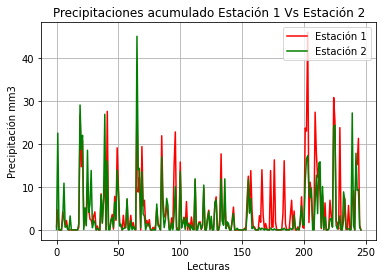

<Figure size 720x720 with 0 Axes>

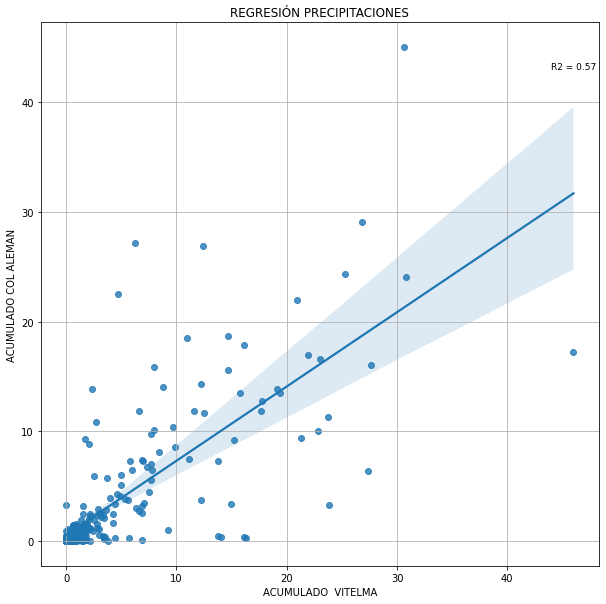

Exito...


In [44]:
xls = pd.ExcelFile(r'D:\UAESP\Corte_Cesped\file_test.xlsx')
folder_image_outputs = r"D:\UAESP\Corte_Cesped\plots_outputs_2"

calculo_graficas(xls, folder_image_outputs)

In [48]:
def calculo_tabla_final(xls_fechas_cortes, folder_output_salida):
    
    df_fechas_cortes = pd.read_excel(xls_fechas_cortes)
    df_fechas_cortes.dtypes
    
    df_fechas_cortes = df_fechas_cortes.dropna()
    
    #conseguir fechas unicas
    fechas_unicas = df_fechas_cortes[["Fecha Corte"]]
    df_fechas_unicas = fechas_unicas.drop_duplicates("Fecha Corte").reset_index(drop=True)

    a_fechas_corte = []
    a_fechas_medicion = []
    a_ppt_promedio = []
    a_alt_promedio_pasto = []
    a_ppt_promedio_acumulado = []
    a_diff_promedio_alt_pasto = []
    a_valores_index = []

    for j in range(0, len(df_fechas_unicas)):

        #print(j)

        #consiguiendo fechas de cortes y promedio altura pasto

        inicial_fecha_corte = df_fechas_unicas["Fecha Corte"].values[j]
        df_fechas_unicas_filtered = df_fechas_cortes[df_fechas_cortes["Fecha Corte"] == inicial_fecha_corte]
        ultima_fecha_medicion = df_fechas_unicas_filtered["Fecha de Medición"].max()
        ultima_altura_pasto = df_fechas_unicas_filtered["Promedio"].values[-1]
        diff_altura_pasto = df_fechas_unicas_filtered["Promedio"].values[-1] - df_fechas_unicas_filtered["Promedio"].values[0]

        #agregando fechas, altura promedio y diferencia promedio

        a_fechas_corte.append(inicial_fecha_corte)
        a_fechas_medicion.append(ultima_fecha_medicion)
        a_alt_promedio_pasto.append(ultima_altura_pasto)
        a_diff_promedio_alt_pasto.append(diff_altura_pasto)

        #consiguiendo pmm promedio

        df_ultima_ppt_promedio = df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion]
        val_ultima_ppt_promedio = df_ultima_ppt_promedio["PROMEDIO"].values[0]
        val_ultima_ppt_promedio
        a_ppt_promedio.append(val_ultima_ppt_promedio)

        #consiguiendo pmm promedio acumulado

        valor_salto_index = df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion].index.values[0]
        a_valores_index.append(valor_salto_index)

        if j == 0:

            df_ppt_promedio_acumulado = df_precipitaciones[(df_precipitaciones["FECHALECTURA"] >= inicial_fecha_corte) &
                                                       (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]
        else:

            df_ppt_promedio_acumulado = df_precipitaciones[(df_precipitaciones.index > a_valores_index[j-1]) & 
                                                           (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]

        value_ppt_promedio_acumulado = df_ppt_promedio_acumulado["PROMEDIO"].sum()
        a_ppt_promedio_acumulado.append(value_ppt_promedio_acumulado)
        
    df_final_analisis = pd.DataFrame()
    df_final_analisis["fecha_corte"] = a_fechas_corte
    df_final_analisis["fecha_medicion"] = a_fechas_medicion
    df_final_analisis["pmm_prom"] = a_ppt_promedio
    df_final_analisis["h_prom_pasto"] = a_alt_promedio_pasto
    df_final_analisis["pmm_prom_acumulada"] = a_ppt_promedio_acumulado
    df_final_analisis["Hn_H1"] = a_diff_promedio_alt_pasto

    df_final_analisis.to_excel(os.path.join(folder_output_salida, "tabla_final_parcela.xlsx"))
    print("Exito...")

In [50]:
xls_fechas_cortes = pd.ExcelFile(r'D:\UAESP\Corte_Cesped\file_test_2_fechas_cortes_.xlsx')
folder_outputs_tabla_final = r"D:\UAESP\Corte_Cesped"

calculo_tabla_final(xls_fechas_cortes, folder_outputs_tabla_final)

Exito...
